
# <center>Data Exploration and Analysis</center>

<center>Anshuman Guha</center>  

## Business Understanding (10 points)

<em>Describe the purpose of the data set you selected, i.e., why was the data collected in the first place. Describe how you would define and measure the outcomes from the data set, i.e., why is this data important and how do you know if you have mined useful knowledge from the data set? How would you measure the effectiveness of a good prediction algorigthm? Be specific.</em>

The data used for this assignment was aggregated and published by the <a href="https://www.ok.gov/oeqa/About_OEQA/"> Office of Educational Quality and Accountability</a>, an Oklahoma agency that provides statistical information about the state's public schools. The data comprises 18 Excel files containing information published annually in the agency's <a href="https://www.ok.gov/oeqa/School_&_District_Profiles_Reports/index.html">Oklahoma School Profiles Reports</a>. The data contains information from 1997 to 2014. The Excel files were e-mailed March 22, 2016.

Jeff Wallace, assistant director of educational accountability, explained on March 22, 2016, (the same day the files were e-mailed) that the purpose of collecting and publishing the data is to provide citizens and legislators with quantiative descriptions of Oklahoma's public schools. While the data contains many of the same variables each year, some variables are changed, i.e., added or removed, because of legislative changes or prevailing public sentiment about public education. For example, the 2014 data contains xxxxx; the 1997 data does not contain these variables.

The agency's website explains that the variables in the School Profiles quantify three constructs: community characteristics, educational process and student performance.

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import os,sys
import xlrd


### Create list of files provided by OEQA

In [6]:
directoryPath = 'oeqaProfiles'
directory = os.listdir(directoryPath)
oeqaFilesProvided = []
for file in directory:
        oeqaFilesProvided.append(file)
print ('Number of files: '+ str(len(oeqaFilesProvided)))
print (oeqaFilesProvided)

Number of files: 18
['Profiles Database 1997(Excel 5).xls', 'Profiles Database 1998.xls', 'Profiles Database 1999.xls', 'Profiles Database 2000.xls', 'Profiles Database 2001.xls', 'Profiles Database 2002.xls', 'Profiles Database 2003.xls', 'Profiles Database 2004.xls', 'Profiles Database 2005.xls', 'Profiles Database 2006.xls', 'Profiles Database 2007.xls', 'Profiles Database 2008.xls', 'Profiles Database 2009.xls', 'Profiles Database 2010.xls', 'Profiles Database 2011.xlsx', 'Profiles Database 2012.xlsx', 'Profiles Database 2013.xlsx', 'Profiles Database 2014.xlsx']


### Create list of years of data

In [7]:
profileYears = []
yearsStart = int(1997)

while yearsStart < 2015:
    profileYears.append(yearsStart)
    yearsStart = yearsStart+1
print (profileYears)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


### Import files to dictionary of dataframes

In [8]:
def importExcelFiles(dictionary,years,files,directory,sheetKeyword):
    count = 0
    for year in years:
        yearData = str(year)
        fileName = files[count]
        dataFrameName = sheetKeyword+yearData
        pathToFile = os.path.join(directory,fileName)
        sheetNames = pd.ExcelFile(pathToFile).sheet_names
        for sheetName in sheetNames:
            if sheetKeyword in sheetName:
                #Use print to provide user feedback
                print (fileName+" is now '"+dataFrameName+"'")
                try: 
                    dictionary[dataFrameName]=pd.read_excel(pathToFile,sheetname=sheetName,header=None)
                    ## Having an error with 2005
                except:
                    pass
        count = count+1
        
dataFrames = {}
importExcelFiles(dataFrames,profileYears,oeqaFilesProvided,"oeqaProfiles","School")

Profiles Database 1997(Excel 5).xls is now 'School1997'
Profiles Database 1998.xls is now 'School1998'
Profiles Database 1999.xls is now 'School1999'
Profiles Database 2000.xls is now 'School2000'
Profiles Database 2001.xls is now 'School2001'
Profiles Database 2002.xls is now 'School2002'
Profiles Database 2003.xls is now 'School2003'
Profiles Database 2004.xls is now 'School2004'
Profiles Database 2005.xls is now 'School2005'
Profiles Database 2006.xls is now 'School2006'
Profiles Database 2007.xls is now 'School2007'
Profiles Database 2008.xls is now 'School2008'
Profiles Database 2009.xls is now 'School2009'
Profiles Database 2010.xls is now 'School2010'
Profiles Database 2011.xlsx is now 'School2011'
Profiles Database 2012.xlsx is now 'School2012'
Profiles Database 2013.xlsx is now 'School2013'
Profiles Database 2014.xlsx is now 'School2014'


### View keys for dataframes

In [9]:
dfKeys = list(dataFrames.keys())
print (dfKeys)

['School2001', 'School2003', 'School1998', 'School2008', 'School2009', 'School2012', 'School2000', 'School2007', 'School2013', 'School1999', 'School2002', 'School1997', 'School2006', 'School2004', 'School2010', 'School2014', 'School2011']


### Count records in data set, see number of attributes in data frames

In [20]:
numberOfRecords = []
numberOfAttributes = []

for df in dfKeys:
    shapeTuple = dataFrames[df].shape
    numberOfRecords.append(shapeTuple[0])
    numberOfAttributes.append(shapeTuple[1])

minAttributes = str(min(numberOfAttributes))
maxAttributes = str(max(numberOfAttributes))

print ("The data contains "+str(sum(numberOfRecords))+ " records.")
print ("The number of attributes in the data ranges from "+minAttributes+ " to "+maxAttributes+".")

The data contains 30449 records.
The number of attributes in the data ranges from 115 to 207.


### Examine raw dimensions of 2014 data

In [10]:
school2014raw = dataFrames["School2014"]
school2014raw.shape

(1777, 207)

### View head of raw 2014

In [11]:
school2014raw.head(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,Rec No:,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,NaN,PRIMARY State Average:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
3,NaN,School Header,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"EOI - U.S. History (All Students, FAY)",NaN,"EOI - Biology I (All Students, FAY)",NaN,"EOI - Algebra II (All Students, FAY)",NaN,"EOI - Geometry (All Students, FAY)",NaN,"EOI - English III (All Students, FAY)",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN
6,Rec No.,SDE,CoNo,DistNo,SitNo,Type,Template,County,District,Site,...,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory
7,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### View tail of raw 2014 data

In [12]:
school2014raw.tail(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
1769,1763,77I002715,77,I002,715,2,SECONDARY,WOODWARD,MOORELAND,SENIOR HIGH SCHOOL,...,44,96,10,49,23,81,45,90,20,90
1770,1764,77I003105,77,I003,105,1,PRIMARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1771,1765,77I003705,77,I003,705,2,SECONDARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL HIGH SCHOOL,...,10,85,10,45,0,55,20,70,17,75
1772,1766,77I005105,77,I005,105,1,PRIMARY,WOODWARD,FORT SUPPLY,FORT SUPPLY ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1773,1767,77I005705,77,I005,705,2,SECONDARY,WOODWARD,FORT SUPPLY,FORT SUPPLY HIGH SCHOOL,...,**,**,**,**,33,83,29,71,38,100
1774,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,NaN,NaN,NaN,NaN,NaN,1,PRIMARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
1776,NaN,NaN,State Average:,NaN,NaN,2,SECONDARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87


### Select school records

In [13]:
def selectSchoolRecords(dataFrame,startRow,endRow):
    schoolRecords = dataFrame[startRow:endRow]
    schoolRecords = schoolRecords.reset_index(drop=True)
    return schoolRecords
    
selectedRecords = selectSchoolRecords(school2014raw,7,1774)
selectedRecords.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1,2,01C022105,01,C022,105,1,PRIMARY,ADAIR,MARYETTA,MARYETTA ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,3,01C024105,01,C024,105,1,PRIMARY,ADAIR,ROCKY MOUNTAIN,ROCKY MOUNTAIN ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
3,4,01C028105,01,C028,105,1,PRIMARY,ADAIR,ZION,ZION ELEMENTARY,...,DNA,DNA,0,75,DNA,DNA,DNA,DNA,DNA,DNA
4,5,01C029105,01,C029,105,1,PRIMARY,ADAIR,DAHLONEGAH,DAHLONEGAH ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### List of attributes to extract
After reviewing Excel file

In [14]:
attributes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76]
len(attributes)

60

### Extract attributes for analysis

In [15]:
school2014 = selectedRecords[attributes]
school2014.shape

(1767, 60)

### List of new column names
After reviewing Excel file

In [16]:
attributeNames = ["recordNumber","schoolID","countyNumber","districtID","siteID","schoolType","template","county","district",
"school","lowGrade","highGrade","gradeSpan","address1","address2","telephone","release","whiteOther_School","black_School",
"asian_School","hispanic_School","nativeAmerican_School","whiteOther_District","black_District","asian_District",
"hispanic_District","nativeAmerican_District","averagePropertyValuePerADM_District","freeReducedLunch_School",
"freeReducedLunch_District","population_District","averageHouseholdIncome_District","unemploymentRate_District",
"povertyRate_District","singleParentFamilies_District","educationalAttainment_collegeAndAbove_District","educationalAttainment_highSchoolNoCollegeDegree_District",
"educationalAttainment_lessThan12thGrade_District","fallEnrollment_School","fallEnrollment_District","nonSpecialEdTeachersFTE_School",
"nonSpecialEdTeachersFTE_District","averageSalaryTeachers_School","averageSalaryTeachers_District","advancedDegreeTeachers_School",
"advancedDegreeTeachers_District","yearsExperienceTeachers_School","yearsExperienceTeachers_District","studentsInSpecialEd_School",
"studentsInSpecialEd_District","studentsInELL_School","studentsInELL_District","specialEdTeachersFTE_School","specialEdTeachersFTE_District",
"counselorsFTE_School","counselorsFTE_District","otherProfessionalStaffFTE_School","otherProfessionalStaffFTE_District",
"administratorsFTE_School","administratorsFTE__District"]
len(attributeNames)

60

### Rename columns

In [17]:
school2014.columns = attributeNames
school2014.columns

Index(['recordNumber', 'schoolID', 'countyNumber', 'districtID', 'siteID',
       'schoolType', 'template', 'county', 'district', 'school', 'lowGrade',
       'highGrade', 'gradeSpan', 'address1', 'address2', 'telephone',
       'release', 'whiteOther_School', 'black_School', 'asian_School',
       'hispanic_School', 'nativeAmerican_School', 'whiteOther_District',
       'black_District', 'asian_District', 'hispanic_District',
       'nativeAmerican_District', 'averagePropertyValuePerADM_District',
       'freeReducedLunch_School', 'freeReducedLunch_District',
       'population_District', 'averageHouseholdIncome_District',
       'unemploymentRate_District', 'povertyRate_District',
       'singleParentFamilies_District',
       'educationalAttainment_collegeAndAbove_District',
       'educationalAttainment_highSchoolNoCollegeDegree_District',
       'educationalAttainment_lessThan12thGrade_District',
       'fallEnrollment_School', 'fallEnrollment_District',
       'nonSpecialEdTeache

### Check attribute data types

In [18]:
school2014.dtypes

recordNumber                                                object
schoolID                                                    object
countyNumber                                                object
districtID                                                  object
siteID                                                      object
schoolType                                                  object
template                                                    object
county                                                      object
district                                                    object
school                                                      object
lowGrade                                                    object
highGrade                                                   object
gradeSpan                                                   object
address1                                                    object
address2                                                    ob

In [20]:
import warnings
warnings.filterwarnings('ignore')

school2014["studentsInSpecialEd_School"]=school2014["studentsInSpecialEd_School"].replace(to_replace='DNA', value=np.nan,regex=True)

### Set attribute data types
After reviewing Excel file

In [21]:
school2014["recordNumber"] = school2014["recordNumber"].astype('int') # recordNumber
school2014["schoolID"] = school2014["schoolID"].astype('str') # schoolID 1
school2014["countyNumber"] = school2014["countyNumber"].astype('category') # countyNumber
school2014["districtID"] = school2014["districtID"].astype('category') # districtID
school2014["siteID"] = school2014["siteID"].astype('category') # siteID
school2014["schoolType"] = school2014["schoolType"].astype('category') # schoolType
school2014["template"] = school2014["template"].astype('category') # template
school2014["county"] = school2014["county"].astype('category') # county
school2014["district"] = school2014["district"].astype('category') # district 2
school2014["school"] = school2014["school"].astype('str') # school 3
school2014["lowGrade"] = school2014["lowGrade"].astype('category') # lowGrade
school2014["highGrade"] = school2014["highGrade"].astype('category') # highGrade
school2014["gradeSpan"] = school2014["gradeSpan"].astype('category') # gradeSpan 4
school2014["address1"] = school2014["address1"].astype('str') # address1
school2014["address2"] = school2014["address2"].astype('str') # address2
school2014["telephone"] = school2014["telephone"].astype('str') # telephone
school2014["release"] = school2014["release"].astype('category') # release
school2014["whiteOther_School"] = school2014["whiteOther_School"].astype('float') # whiteOther_School ratio 5
school2014["black_School"] = school2014["black_School"].astype('float') # black_School ratio 6
school2014["asian_School"] = school2014["asian_School"].astype('float') # asian_School ratio 7
school2014["hispanic_School"] = school2014["hispanic_School"].astype('float') # hispanic_School ratio 8
school2014["nativeAmerican_School"] = school2014["nativeAmerican_School"].astype('float') # nativeAmerican_School ratio 9
school2014["whiteOther_District"] = school2014["whiteOther_District"].astype('float') # whiteOther_District ratio 10 
school2014["black_District"] = school2014["black_District"].astype('float') # black_District ratio 11
school2014["asian_District"] = school2014["asian_District"].astype('float') # asian_District ratio 12
school2014["hispanic_District"] = school2014["hispanic_District"].astype('float') # hispanic_District ratio 13 
school2014["nativeAmerican_District"] = school2014["nativeAmerican_District"].astype('float') # nativeAmerican_District ratio 14
school2014["averagePropertyValuePerADM_District"] = school2014["averagePropertyValuePerADM_District"].astype('float') # averagePropertyValuePerADM_District 15
school2014["freeReducedLunch_School"] = school2014["freeReducedLunch_School"].astype('float') # freeReducedLunch_School 16
school2014["freeReducedLunch_District"] = school2014["freeReducedLunch_District"].astype('float') # freeReducedLunch_District 17
school2014["population_District"] = school2014["population_District"].astype('int') # population_District 18
school2014["averageHouseholdIncome_District"] = school2014["averageHouseholdIncome_District"].astype('float') # averageHouseholdIncome_District 19 
school2014["unemploymentRate_District"] = school2014["unemploymentRate_District"].astype('float') # unemploymentRate_District 20
school2014["povertyRate_District"] = school2014["povertyRate_District"].astype('float') # povertyRate_District 21
school2014["singleParentFamilies_District"] = school2014["singleParentFamilies_District"].astype('float') # singleParentFamilies_District 22
school2014["educationalAttainment_collegeAndAbove_District"] = school2014["educationalAttainment_collegeAndAbove_District"].astype('float') # educationalAttainment_collegeAndAbove_District 23
school2014["educationalAttainment_highSchoolNoCollegeDegree_District"] = school2014["educationalAttainment_highSchoolNoCollegeDegree_District"].astype('float') # educationalAttainment_highSchoolNoCollegeDegree_District 24
school2014["educationalAttainment_lessThan12thGrade_District"] = school2014["educationalAttainment_lessThan12thGrade_District"].astype('float') # educationalAttainment_lessThan12thGrade_District 25
school2014["fallEnrollment_School"] = school2014["fallEnrollment_School"].astype('int') # fallEnrollment_School 26
school2014["fallEnrollment_District"] = school2014["fallEnrollment_District"].astype('int') # fallEnrollment_District 27
school2014["nonSpecialEdTeachersFTE_School"] = school2014["nonSpecialEdTeachersFTE_School"].astype('float') # nonSpecialEdTeachersFTE_School 28
school2014["nonSpecialEdTeachersFTE_District"] = school2014["nonSpecialEdTeachersFTE_District"].astype('float') # nonSpecialEdTeachersFTE_District 29
school2014["averageSalaryTeachers_School"] = school2014["averageSalaryTeachers_School"].astype('float') # averageSalaryTeachers_School 30 
school2014["averageSalaryTeachers_District"] = school2014["averageSalaryTeachers_District"].astype('float') # averageSalaryTeachers_District 31
school2014["advancedDegreeTeachers_School"] = school2014["advancedDegreeTeachers_School"].astype('float') # advancedDegreeTeachers_School 32
school2014["advancedDegreeTeachers_District"] = school2014["advancedDegreeTeachers_District"].astype('float') # advancedDegreeTeachers_District 33
school2014["yearsExperienceTeachers_School"] = school2014["yearsExperienceTeachers_School"].astype('float') # yearsExperienceTeachers_School 34
school2014["yearsExperienceTeachers_District"] = school2014["yearsExperienceTeachers_District"].astype('float') # yearsExperienceTeachers_District 35
school2014["studentsInSpecialEd_School"] = school2014["studentsInSpecialEd_School"].astype('float') # studentsInSpecialEd_School 36
school2014["studentsInSpecialEd_District"] = school2014["studentsInSpecialEd_District"].astype('float') # studentsInSpecialEd_District 37
school2014["studentsInELL_School"] = school2014["studentsInELL_School"].astype('float') # studentsInELL_School 38
school2014["studentsInELL_District"] = school2014["studentsInELL_District"].astype('float') # studentsInELL_District 38
school2014["specialEdTeachersFTE_School"] = school2014["specialEdTeachersFTE_School"].astype('float') # specialEdTeachersFTE_School 40
school2014["specialEdTeachersFTE_District"] = school2014["specialEdTeachersFTE_District"].astype('float') # specialEdTeachersFTE_District 41 
school2014["counselorsFTE_School"] = school2014["counselorsFTE_School"].astype('float') # counselorsFTE_School 42 
school2014["counselorsFTE_District"] = school2014["counselorsFTE_District"].astype('float') # counselorsFTE_District 43
school2014["otherProfessionalStaffFTE_School"] = school2014["otherProfessionalStaffFTE_School"].astype('float') # otherProfessionalStaffFTE_School 44
school2014["otherProfessionalStaffFTE_District"] = school2014["otherProfessionalStaffFTE_District"].astype('float') # otherProfessionalStaffFTE_District 45 
school2014["administratorsFTE_School"] = school2014["administratorsFTE_School"].astype('float') # administratorsFTE_School 46
school2014["administratorsFTE__District"] = school2014["administratorsFTE__District"].astype('float') # administratorsFTE__District 47

### Recheck attribute data types

In [22]:
school2014.dtypes

recordNumber                                                   int32
schoolID                                                      object
countyNumber                                                category
districtID                                                  category
siteID                                                      category
schoolType                                                  category
template                                                    category
county                                                      category
district                                                    category
school                                                        object
lowGrade                                                    category
highGrade                                                   category
gradeSpan                                                   category
address1                                                      object
address2                          

## Data Understanding

<strong>[10 points]</strong> <em>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file</em>

The 2014 data contains 207 attributes representing 1,767 records. For this assignment we will examine the following 60 of those attributes.  
<ul>
<li>
<strong>recordNumber</strong> <em>(integer)</em>: An incrementing count of each school record in the 2014 data.
</li>
<li>
<strong>schoolID</strong> <em>(string)</em>: A unique identifier for a school.
</li>
<li>
<strong>countyNumber</strong> <em>(int)</em>: An integer representing the 77 counties in Oklahoma.
</li>
<li>
<strong>districtID</strong> <em>(category)</em>: A string identifier for a district.
</li>
<li>
<strong>siteID</strong> <em>(category)</em>: An identifier for a school. 
</li>
<li>
<strong>schoolType</strong> <em>(category)</em>: A categorical integer value indicated the template of the school.
</li>
<li>
<strong>template</strong> <em>(category)</em>: A categorical value indicated the school type.
</li>
<li>
<strong>county</strong> <em>(category)</em>: A string value indicating the county where the school is located. 
</li>
<li>
<strong>district</strong> <em>(category)</em>: The district associated with a school record.
</li>
<li>
<strong>school</strong> <em>(category)</em>: A school's name.
</li>
<li>
<strong>lowGrade</strong> <em>(category)</em>: The lowest grade level provided at a school.
</li>
<li>
<strong>highGrade</strong> <em>(category)</em>: The highes grade level provided at a school.
</li>
<li>
<strong>gradeSpan</strong> <em>(category)</em>: Grade levels provided at a school.
</li>
<li>
<strong>address1</strong> <em>(string)</em>: A school's mailing address.
</li>
<li>
<strong>address2</strong> <em>(string)</em>: A school's city, state and postal code.
</li>
<li>
<strong>telephone</strong> <em>(string)</em>: A school's telephone.
</li>
<li>
<strong>release</strong> <em>(category)</em>: A binary categorical variable: yes || no.
</li>
<li>
<strong>whiteOther_School</strong> <em>(float/ratio)</em>: The percentage of school's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>whiteOther_District</strong> <em>(float/ratio)</em>: The percentage of district's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>averagePropertyValuePerADM_District</strong> <em>(float/ratio)</em>: The average property value in a district based on district enrollment.
</li>
<li>
<strong>freeReducedLunch_School</strong> <em>(float/ratio)</em>: Percentage of a school's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>freeReducedLunch_District</strong> <em>(float/ratio)</em>: Percentage of a district's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>population_District</strong> <em>(integer/ratio)</em>: Population count of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>averageHouseholdIncome_District</strong> <em>(float/ratio)</em>: Average household income of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>unemploymentRate_District</strong> <em>(float/ratio)</em>: Unemployment rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>povertyRate_District</strong> <em>(float/ratio)</em>: Poverty rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>singleParentFamilies_District</strong> <em>(float/ratio)</em>: Single-parent families (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_collegeAndAbove_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have a college degree or taken graduate course work. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_highSchoolNoCollegeDegree_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who graduated from high school and have no college degree. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_lessThan12thGrade_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have less than 12th grade education. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>fallEnrollment_School</strong> <em>(float/ratio)</em>: Number of students enrolled in the school during the fall.
</li>
<li>
<strong>fallEnrollment_District</strong> <em>(float/ratio)</em>: Number of students enrolled in the district during the fall.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_School</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the school who are not special education teachers.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_District</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the district who are not special education teachers.
</li>
<li>
<strong>averageSalaryTeachers_School</strong> <em>(float/ratio)</em>: Average salary of teachers at the school.
</li>
<li>
<strong>averageSalaryTeachers_District</strong> <em>(float/ratio)</em>: Average salary of teachers at the district.
</li>
<li>
<strong>advancedDegreeTeachers_School</strong> <em>(float/ratio)</em>: Percentage of teachers at the school who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>advancedDegreeTeachers_District</strong> <em>(float/ratio)</em>: Percentage of teachers at the district who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>yearsExperienceTeachers_School</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the school.
</li>
<li>
<strong>yearsExperienceTeachers_District</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the district.
</li>
<li>
<strong>studentsInSpecialEd_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are in special education.
</li>
<li>
<strong>studentsInSpecialEd_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are in special education.
</li>
<li>
<strong>studentsInELL_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are English language learners.
</li>
<li>
<strong>studentsInELL_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are English language learners.
</li>
<li>
<strong>specialEdTeachersFTE_School</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the school.
</li>
<li>
<strong>specialEdTeachersFTE_District</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the district.
</li>
<li>
<strong>counselorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time counselors at the school.
</li>
<li>
<strong>counselorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time counselors at the district.
</li>
<li>
<strong>otherProfessionalStaffFTE_School</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the school.
</li>
<li>
<strong>otherProfessionalStaffFTE_District</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the district.
</li>
<li>
<strong>administratorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time administrators at the school.
</li>
<li>
<strong>administratorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time administrators at the district.
</li>
</ul>

<em><strong>NOTE:</strong> Because of the amount of munging necessary to combine all files, we only examined the 2014 data and a subset of that data's attributes to demonstrate our competency at the assignment's objectives</em>

## Data Understanding
<strong>[15 points]</strong> <em>Verify data quality: Explain any missing values, duplicate data and outliers. Are those mistakes? How do you deal with these problems? Be specific.</em>

<strong>Missing Values</strong>
Of the 60 attributes examined of the 207 in the school 2014 data, only one attribute contained missing data: "studentsInSpecialEd_School". The missing values were represented by a string value "DNA", i.e., Data not available. The DNA values were replaced with NaN values. Missing values will be appropriately imputed in the later analysis.

<strong>Duplicate Data</strong>
Of the 1,767 records in the 2014 school data, several values duplicate among "district" variables, e.g., otherProfessionalStaffFTE_District. This occurs because a district can contain several schools, thus repeated values. Therefore, following exploratory analysis will only school attributes.

<strong>Outliers</strong>
Outliers will be reported (if identified) in the following "Data Understanding" section. But descriptive statistics of the freeAndReducedLunch_School variable indicates an possible error that will need to be addressed.

In [24]:
selectedAttributes = ["schoolID","template","county","district",
"school","gradeSpan","whiteOther_School","black_School",
"asian_School","hispanic_School","nativeAmerican_School",
"freeReducedLunch_School","fallEnrollment_School","nonSpecialEdTeachersFTE_School",
"averageSalaryTeachers_School","advancedDegreeTeachers_School",
"yearsExperienceTeachers_School","studentsInSpecialEd_School",
"studentsInELL_School","specialEdTeachersFTE_School",
"counselorsFTE_School","otherProfessionalStaffFTE_School",
"administratorsFTE_School"]

selectedSchool2014 = school2014[selectedAttributes]



### exploring missing values and imputing them appropriately

In [25]:
# checking for missing values in classSchool2014
selectedSchool2014.isnull().sum()

schoolID                             0
template                             0
county                               0
district                             0
school                               0
gradeSpan                            0
whiteOther_School                    0
black_School                         0
asian_School                         0
hispanic_School                      0
nativeAmerican_School                0
freeReducedLunch_School              0
fallEnrollment_School                0
nonSpecialEdTeachersFTE_School       0
averageSalaryTeachers_School         0
advancedDegreeTeachers_School        0
yearsExperienceTeachers_School       0
studentsInSpecialEd_School          14
studentsInELL_School                 0
specialEdTeachersFTE_School          0
counselorsFTE_School                 0
otherProfessionalStaffFTE_School     0
administratorsFTE_School             0
dtype: int64

#### Imputting the attribute 'studentsInSpecialEd_School' 
The 14 missing values will be imputed by the mean value from all the schools within the county as schools in same locality are likely to have similar statistical characteristics

In [26]:
selectedSchool2014_grouped = selectedSchool2014.groupby(by= ['county'])

selectedSchool2014_imputed = selectedSchool2014_grouped.transform(lambda grp: grp.fillna(grp.mean()))
selectedSchool2014_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 17 columns):
whiteOther_School                   1767 non-null float64
black_School                        1767 non-null float64
asian_School                        1767 non-null float64
hispanic_School                     1767 non-null float64
nativeAmerican_School               1767 non-null float64
freeReducedLunch_School             1767 non-null float64
fallEnrollment_School               1767 non-null int32
nonSpecialEdTeachersFTE_School      1767 non-null float64
averageSalaryTeachers_School        1767 non-null float64
advancedDegreeTeachers_School       1767 non-null float64
yearsExperienceTeachers_School      1767 non-null float64
studentsInSpecialEd_School          1767 non-null float64
studentsInELL_School                1767 non-null float64
specialEdTeachersFTE_School         1767 non-null float64
counselorsFTE_School                1767 non-null float64
otherProfessionalStaffFTE

In [27]:
selectedSchool2014_imputed['county'] = pd.Series(selectedSchool2014.county, index=selectedSchool2014_imputed.index)
selectedSchool2014_imputed['schoolID'] = pd.Series(selectedSchool2014.schoolID, index=selectedSchool2014_imputed.index)

### Creating a categorical attribute for student population race 

In [28]:
selectedSchool2014_imputed['student_ethnicity'] = pd.cut(selectedSchool2014_imputed.whiteOther_School,[0,.5,1e6],3,labels=
                                                         ['NonWhite_majority','White_majority']) 
# this creates a new variable
selectedSchool2014_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 20 columns):
whiteOther_School                   1767 non-null float64
black_School                        1767 non-null float64
asian_School                        1767 non-null float64
hispanic_School                     1767 non-null float64
nativeAmerican_School               1767 non-null float64
freeReducedLunch_School             1767 non-null float64
fallEnrollment_School               1767 non-null int32
nonSpecialEdTeachersFTE_School      1767 non-null float64
averageSalaryTeachers_School        1767 non-null float64
advancedDegreeTeachers_School       1767 non-null float64
yearsExperienceTeachers_School      1767 non-null float64
studentsInSpecialEd_School          1767 non-null float64
studentsInELL_School                1767 non-null float64
specialEdTeachersFTE_School         1767 non-null float64
counselorsFTE_School                1767 non-null float64
otherProfessionalStaffFTE

In [29]:

demographicAttributes = ["schoolID","county","student_ethnicity","whiteOther_School","black_School",
"asian_School","hispanic_School","nativeAmerican_School",
"freeReducedLunch_School"]

classroomAttributes = ["county","student_ethnicity","fallEnrollment_School","nonSpecialEdTeachersFTE_School",
"averageSalaryTeachers_School","advancedDegreeTeachers_School",
"yearsExperienceTeachers_School","studentsInSpecialEd_School",
"studentsInELL_School","specialEdTeachersFTE_School"]

adminAttributes = ["county","student_ethnicity","counselorsFTE_School","otherProfessionalStaffFTE_School",
"administratorsFTE_School"]

demoSchool2014 = selectedSchool2014_imputed[demographicAttributes]
classSchool2014 = selectedSchool2014_imputed[classroomAttributes]
adminSchool2014 = selectedSchool2014_imputed[adminAttributes]



## Data Understanding
<strong>[10 points]</strong> <em>Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you
found something interesting. Note: You can also use data from other sources for
comparison. Explain the significance of the statistics run and why they are meaningful.</em>

Having removed the district variables from the 60 attributes selected from the 2014 school data and irrelevant variables, i.e., recordNumber, template, address1, etc., the exploratory analysis proceeds with 22 attributes. The following provides descriptive statistics for the 22 attributes.

In [30]:
demoSchool2014.describe()

,whiteOther_School,black_School,asian_School,hispanic_School,nativeAmerican_School,freeReducedLunch_School
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.00000
mean,0.601939,0.072417,0.013978,0.127261,0.184406,0.65331
std,0.201694,0.136367,0.023288,0.152940,0.172313,0.21045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.485100,0.006500,0.000000,0.040200,0.046550,0.51395
50%,0.636400,0.023700,0.006100,0.075900,0.127700,0.66830
75%,0.751400,0.064900,0.017400,0.140000,0.285700,0.80055
max,0.974800,0.944600,0.213600,0.930800,0.991000,1.41460


In [31]:
demoSchool2014.median()

whiteOther_School          0.6364
black_School               0.0237
asian_School               0.0061
hispanic_School            0.0759
nativeAmerican_School      0.1277
freeReducedLunch_School    0.6683
dtype: float64

Since the distribution is highly skewed to the right we will consider the median value.As shown above the median student population in a given county is 63% white, 12% native american, 6% asian and 23% black. 

### Explore possible error in freeReducedLunch_School

- demoSchool2014[demoSchool2014['freeReducedLunch_School']>1] .
- It is unclear how the percentage of freeAndReducedLunches can be greater than 100 percent. 
- Perhaps the values in the attribute are the sum of free and reduced lunch.
- The analysis will investigate the attribute in detail.

In [32]:
classSchool2014.describe()

,fallEnrollment_School,nonSpecialEdTeachersFTE_School,averageSalaryTeachers_School,advancedDegreeTeachers_School,yearsExperienceTeachers_School,studentsInSpecialEd_School,studentsInELL_School,specialEdTeachersFTE_School
count,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000,1767.000000
mean,380.273911,20.993765,43812.698403,0.242418,12.470082,0.166421,0.055967,2.473520
std,328.031585,15.524331,2770.166808,0.134082,3.408854,0.066220,0.110077,2.843986
min,11.000000,2.110000,20555.750000,0.000000,0.976700,0.003900,0.000000,0.000000
25%,167.500000,10.713500,42026.240400,0.149500,10.156450,0.125850,0.000000,0.989000
50%,317.000000,17.857000,43580.253700,0.225200,12.439200,0.157900,0.015600,1.714000
75%,498.500000,26.711000,45416.199150,0.318350,14.603600,0.197450,0.052800,3.000000
max,3336.000000,146.532000,64204.372400,1.000000,26.524200,0.971200,0.741900,27.394000


In [33]:
adminSchool2014.describe()

,counselorsFTE_School,otherProfessionalStaffFTE_School,administratorsFTE_School
count,1767.000000,1767.000000,1767.000000
mean,0.892156,1.625178,1.441968
std,1.012229,1.644432,1.349362
min,0.000000,0.000000,0.000000
25%,0.315000,0.494000,0.963000
50%,0.667000,1.161000,1.000000
75%,1.000000,2.284000,2.000000
max,9.000000,19.824000,17.257000


## Data Understanding
<strong>[15 points]</strong> <em>Visualize the most important attributes appropriately (at least 5 attributes).
Important: Provide an interpretation for each chart. Explain for each attribute why the
chosen visualization is appropriate.</em>

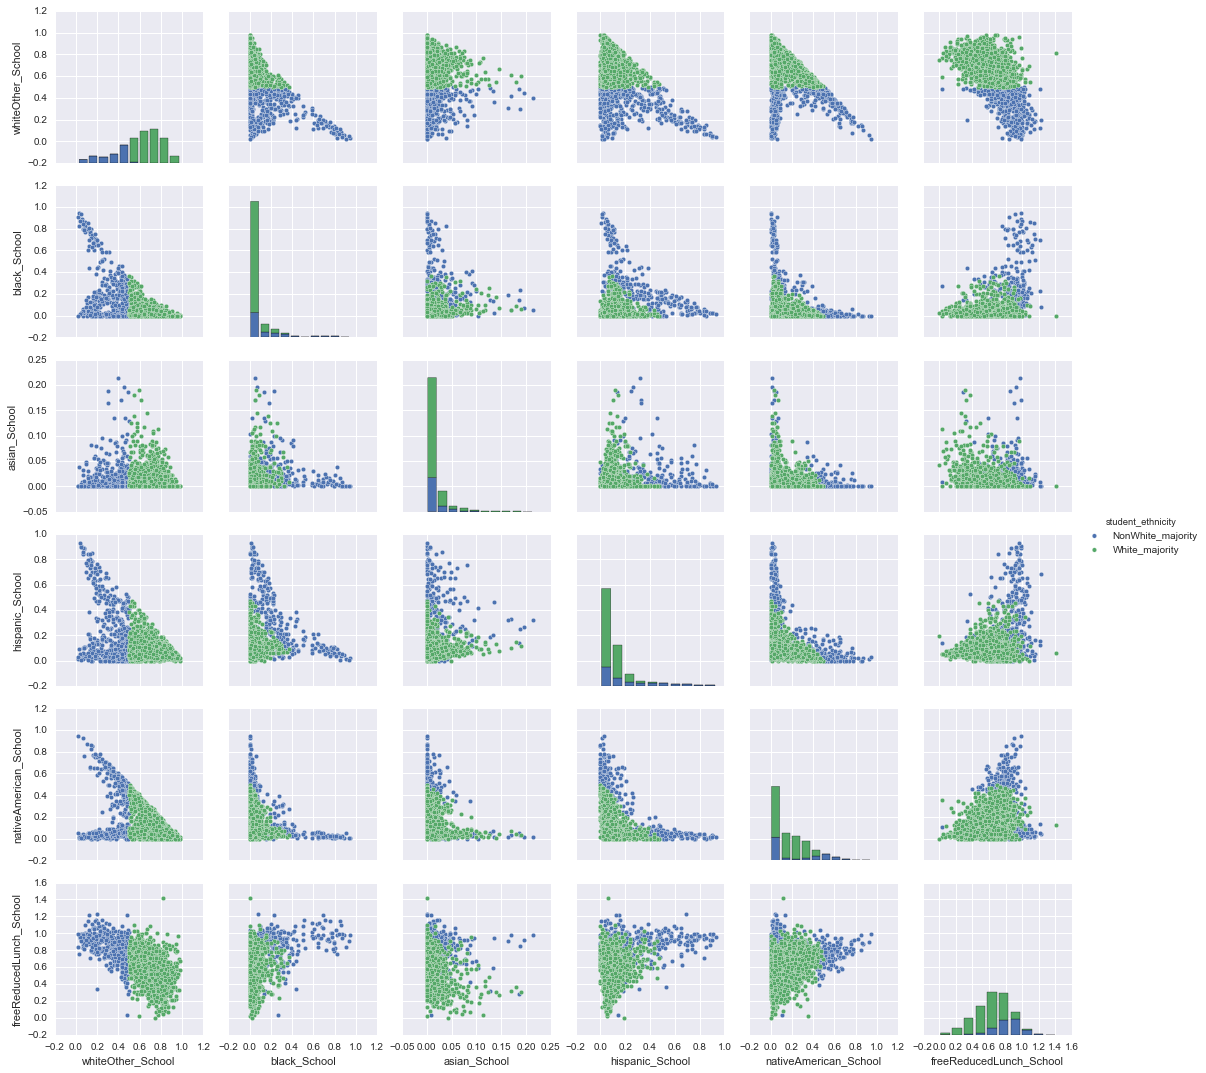

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline
plt.figure()
sns.pairplot(data=demoSchool2014, hue= 'student_ethnicity')



As shown above in the pairplot all races except whiteothers are skewed to the right showing that blacks,hispanics, asians and native americans are concentrated in few counties whereas whites are fairly distrubuted in all counties.

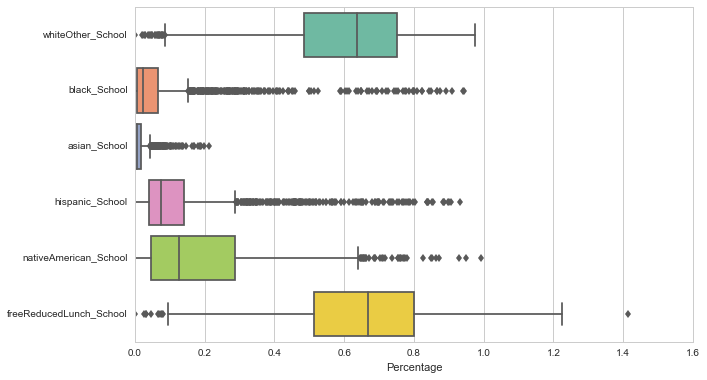

In [35]:
plt.figure(figsize = (10, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=demoSchool2014, orient="h", palette="Set2", saturation = .8, fliersize = 6.)
sns.axlabel("Percentage", "")

As shown above 75% of the distribution of all the races except white are under 30 %. However there are substancial outliers 
where the minorities makeup more than 90% of the county population

In [41]:
demoSchool2014.loc[demoSchool2014['freeReducedLunch_School'].idxmax()]

schoolID                        19I020715
county                              CREEK
student_ethnicity          White_majority
whiteOther_School                  0.8171
black_School                            0
asian_School                            0
hispanic_School                     0.061
nativeAmerican_School               0.122
freeReducedLunch_School            1.4146
Name: 402, dtype: object

In Creek county the freeReducedLunch_School is 140%.This outlier is perhaps an error and will be excluded from the data analysis

In [42]:
demoSchool2014.loc[demoSchool2014['black_School'].idxmax()]

schoolID                           55I037705
county                              OKLAHOMA
student_ethnicity          NonWhite_majority
whiteOther_School                     0.0295
black_School                          0.9446
asian_School                               0
hispanic_School                       0.0221
nativeAmerican_School                 0.0037
freeReducedLunch_School               0.9852
Name: 1032, dtype: object

OKLAHOMA county has a district where 94% of population is black and has a very high freeReducedLunch_School percentage. Relations between this two variables will be investigated below

## Data Understanding
<strong>[15 points]</strong> <em>Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.</em>

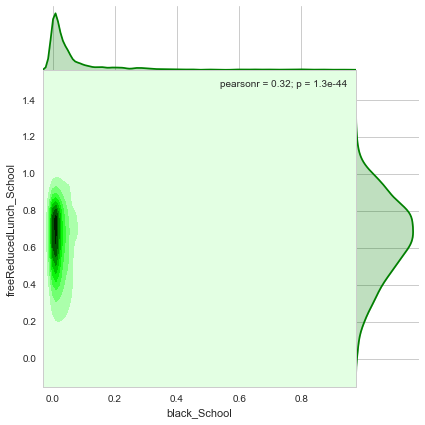

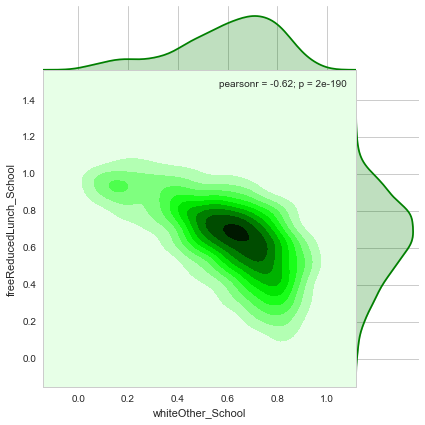

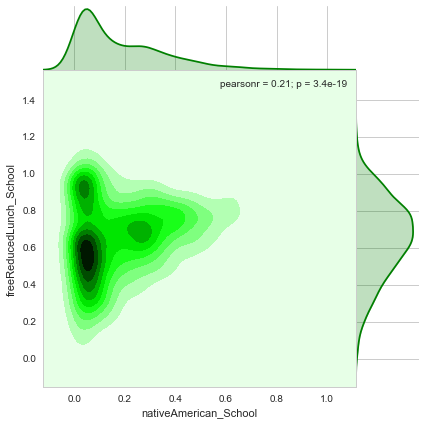

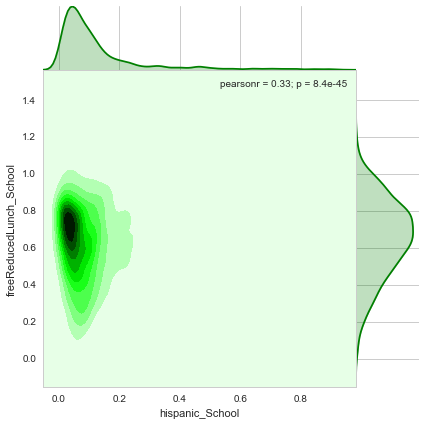

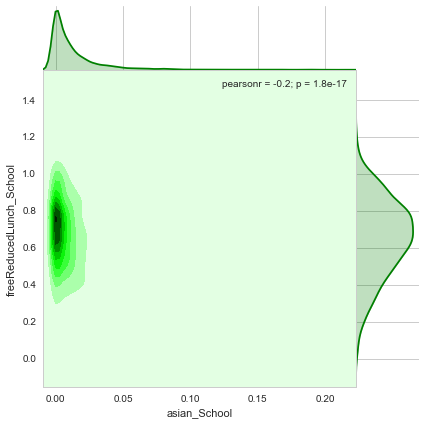

In [43]:
sns.jointplot(x="black_School", y="freeReducedLunch_School", data=demoSchool2014,kind="kde", space=0, color="g");
sns.jointplot(x="whiteOther_School", y="freeReducedLunch_School", data=demoSchool2014,kind="kde", space=0, color="g");
sns.jointplot(x="nativeAmerican_School", y="freeReducedLunch_School", data=demoSchool2014,kind="kde", space=0, color="g");
sns.jointplot(x="hispanic_School", y="freeReducedLunch_School", data=demoSchool2014,kind="kde", space=0, color="g");
sns.jointplot(x="asian_School", y="freeReducedLunch_School", data=demoSchool2014,kind="kde", space=0, color="g");


In the above three joint plot there is a clear correlation between race and free lunch. White and free/reduced lunch has a strong negative pearson r(-0.62) indicating with increase of white population in a district there is a decline in free/reduced %. The opposite is true with the blacks,hispanics and native americans races and free/reduced lunch %. There is no particular relation with asian race and free/reduced lunch %.

### Creating a categorical variable on teachers experience in years

In [44]:
selectedSchool2014_imputed['teacher_exper_range'] = pd.cut(selectedSchool2014_imputed.yearsExperienceTeachers_School,
    [0,10,15,20,1e6],3,labels=['low','below_average','above_average','high'])
selectedSchool2014_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 21 columns):
whiteOther_School                   1767 non-null float64
black_School                        1767 non-null float64
asian_School                        1767 non-null float64
hispanic_School                     1767 non-null float64
nativeAmerican_School               1767 non-null float64
freeReducedLunch_School             1767 non-null float64
fallEnrollment_School               1767 non-null int32
nonSpecialEdTeachersFTE_School      1767 non-null float64
averageSalaryTeachers_School        1767 non-null float64
advancedDegreeTeachers_School       1767 non-null float64
yearsExperienceTeachers_School      1767 non-null float64
studentsInSpecialEd_School          1767 non-null float64
studentsInELL_School                1767 non-null float64
specialEdTeachersFTE_School         1767 non-null float64
counselorsFTE_School                1767 non-null float64
otherProfessionalStaffFTE

## Data Understanding
<strong>[10 points]</strong> <em>Identify and explain interesting relationships between features and the class
you are trying to predict (i.e., relationships with variables and the target classification).</em>

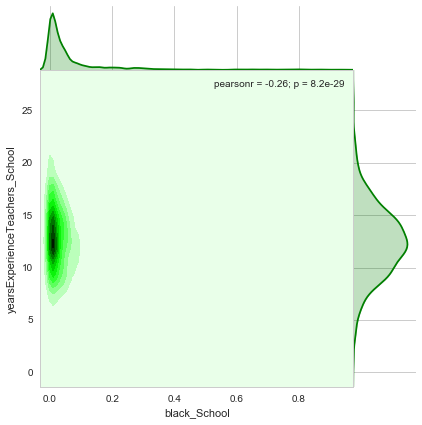

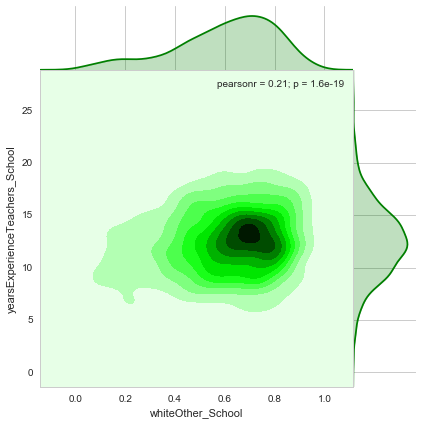

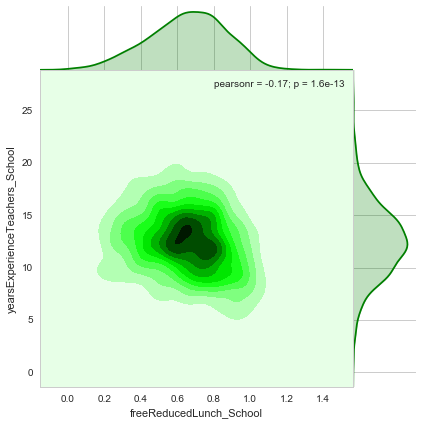

In [46]:
sns.jointplot(x="black_School", y="yearsExperienceTeachers_School", 
              data=selectedSchool2014_imputed,kind="kde", space=0, color="g");

sns.jointplot(x="whiteOther_School", y="yearsExperienceTeachers_School", 
              data=selectedSchool2014_imputed,kind="kde", space=0, color="g");

sns.jointplot(x="freeReducedLunch_School", y="yearsExperienceTeachers_School", 
              data=selectedSchool2014_imputed,kind="kde", space=0, color="g");


The teacher's experience is mostly below average(12.4) for most of the NonWhite_majority schools as indicated by the blue shading. The first row scatter plot indicates teacher's experience is slightly higher for White_majority schools. 
The scond row last colum chart shows that teacher's experience is negatively correlated with the number of NonWhite_majority schools

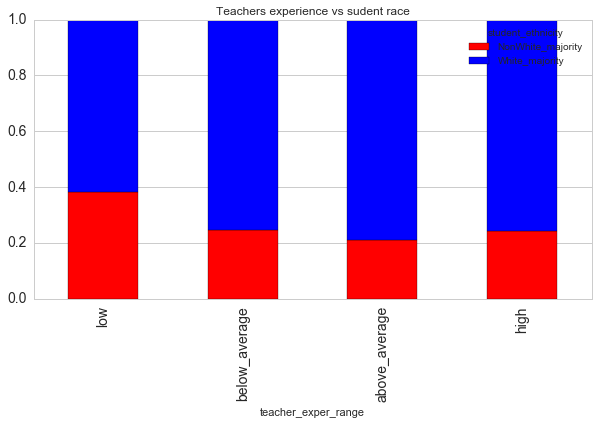

In [47]:
b=selectedSchool2014_imputed.groupby('teacher_exper_range')
a=b.student_ethnicity.value_counts()/b.student_ethnicity.count()
    
a.unstack().plot(kind='bar',stacked=True,color=['r','b'],figsize=(10,5), 
    legend=True,title='Teachers experience vs sudent race', fontsize=14 )

The white majority schools tend to have above average teacher experience

## Data Understanding
<strong>[5 points]</strong> <em>Are there other features that could be added to the data or created from
existing features? Which ones?</em>

The student teacher ratio will have a signifcant meaning while comparing different schools than the actual teacher and student value


In [48]:
y= selectedSchool2014_imputed['fallEnrollment_School']
z = selectedSchool2014_imputed['nonSpecialEdTeachersFTE_School']
selectedSchool2014_imputed['StudentTeacherRatio'] = pd.Series(y/z, index=selectedSchool2014_imputed.index)

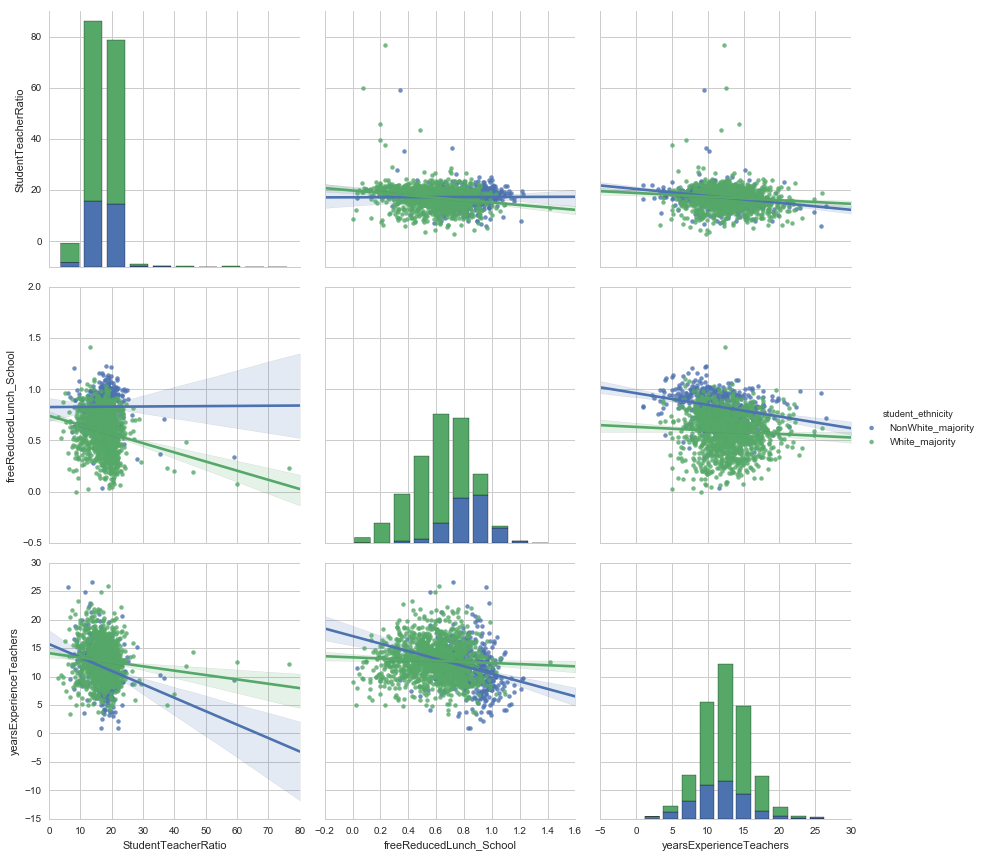

In [53]:

p = sns.pairplot(selectedSchool2014_imputed[Attributes1], hue = "student_ethnicity", vars = Attributes2, kind = "reg", size = 4.)

_ = p.axes[0][0].set_ylabel("StudentTeacherRatio"), p.axes[1][0].set_ylabel("freeReducedLunch_School"),\
p.axes[2][0].set_ylabel("yearsExperienceTeachers")

_ = p.axes[2][0].set_xlabel("StudentTeacherRatio"), p.axes[2][1].set_xlabel("freeReducedLunch_School"),\
p.axes[2][2].set_xlabel("yearsExperienceTeachers")


As shown in the 2 row 1 column,student teacher ratio had a distint negative correlation with free/reduced lunch for both white and nonewhite majority school

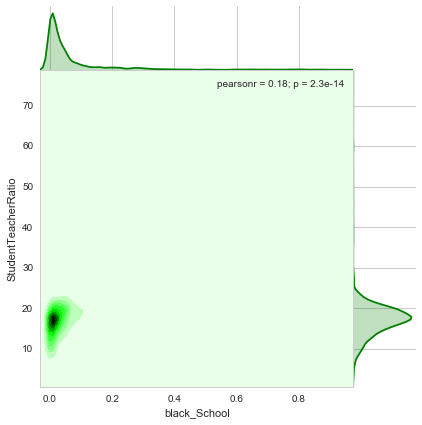

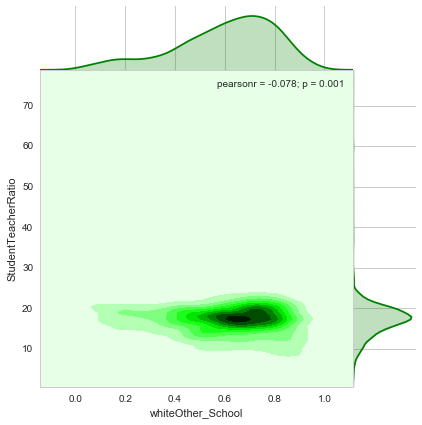

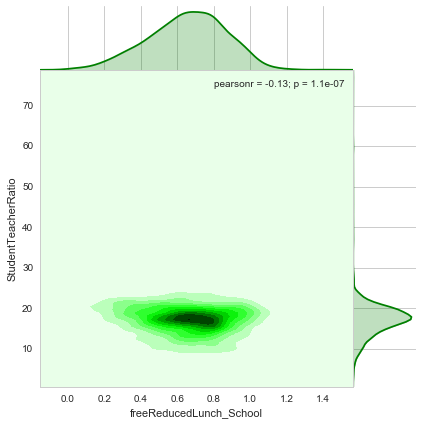

In [52]:
sns.jointplot(x="black_School", y="StudentTeacherRatio", data=selectedSchool2014_imputed,kind="kde", space=0, color="g");

sns.jointplot(x="whiteOther_School", y="StudentTeacherRatio", data=selectedSchool2014_imputed,kind="kde", space=0, color="g");

sns.jointplot(x="freeReducedLunch_School", y="StudentTeacherRatio", data=selectedSchool2014_imputed,kind="kde",
              space=0, color="g");


The student teacher ratio has positive correlation with black population(0.18), slight negative correlation with white population(-0.078) and negative correlation with Reduce/Free Lunch attribute (-0.13).